In [1]:
import pandas as pd
import numpy as np

C:\Users\91968\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from pycaret.classification import *

In [3]:
heart_disease_df = pd.read_csv('cardio_train.csv', sep =';')

In [4]:
heart_disease_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
heart_disease_df = heart_disease_df.drop(['id'], axis=1)


In [6]:
hd_data = heart_disease_df.sample(frac=0.7, random_state=786).reset_index(drop=True)
hd_data_unseen = heart_disease_df.drop(hd_data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(hd_data.shape))
print('Unseen Data For Predictions: ' + str(hd_data_unseen.shape))

Data for Modeling: (49000, 12)
Unseen Data For Predictions: (21000, 12)


<Axes: >

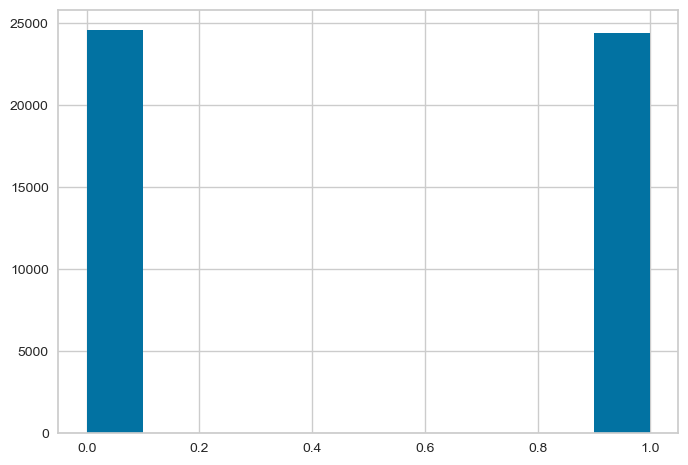

In [7]:
hd_data['cardio'].hist()

In [8]:
heartDisease_clf = setup(data = hd_data, target = 'cardio', session_id=42) 

,Description,Value
0,Session id,42
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(49000, 12)"
4,Transformed data shape,"(49000, 12)"
5,Transformed train set shape,"(34300, 12)"
6,Transformed test set shape,"(14700, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
hf_models =compare_models(n_select = 5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:14:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7372,0.8029,0.6937,0.7580,0.7244,0.4742,0.4760,1.7690
lightgbm,Light Gradient Boosting Machine,0.7344,0.8010,0.6883,0.7563,0.7207,0.4686,0.4705,0.4100
ada,Ada Boost Classifier,0.7311,0.7957,0.6568,0.7696,0.7087,0.4619,0.4670,0.5740
lr,Logistic Regression,0.7184,0.7765,0.6742,0.7376,0.7044,0.4365,0.4382,2.7520
rf,Random Forest Classifier,0.7168,0.7764,0.6985,0.7232,0.7106,0.4335,0.4338,1.8720
et,Extra Trees Classifier,0.7050,0.7620,0.6990,0.7057,0.7023,0.4100,0.4101,1.6900
knn,K Neighbors Classifier,0.6762,0.7219,0.6544,0.6824,0.6680,0.3524,0.3527,0.3930
ridge,Ridge Classifier,0.6497,0.0000,0.6072,0.6614,0.6331,0.2990,0.3001,0.0400
lda,Linear Discriminant Analysis,0.6497,0.7073,0.6072,0.6614,0.6331,0.2991,0.3001,0.0690
dt,Decision Tree Classifier,0.6324,0.6325,0.6354,0.6298,0.6325,0.2649,0.2649,0.1660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
print(hf_models)

In [ ]:
plot_model(hf_models[0], plot = 'auc')

In [ ]:
plot_model(hf_models[0], plot = 'pr')

In [ ]:
plot_model(hf_models[0], plot='feature')

In [ ]:
plot_model(hf_models[2], plot='feature')

In [ ]:
plot_model(hf_models[0], plot = 'confusion_matrix')

In [ ]:
predict_model(hf_models[0])

In [ ]:
predict_model(hf_models[1])

In [ ]:
unseen_predictions = predict_model(hf_models[0], data=hd_data_unseen)
unseen_predictions.head()

In [ ]:
final_GradientBoostingClassifier = finalize_model(hf_models[0])

In [ ]:
unseen_predictions = predict_model(final_GradientBoostingClassifier, data=hd_data_unseen)
unseen_predictions.head()

In [ ]:
save_model(final_GradientBoostingClassifier,'Final GBC Model')

In [ ]:
saved_final_GBC = load_model('Final GBC Model')

In [ ]:
new_prediction = predict_model(saved_final_GBC, data=hd_data_unseen)

In [ ]:
new_prediction.head()